In [386]:
#import libraries
import numpy as np 
import matplotlib.pyplot as plt 

In [387]:
#initialize the parameters
def init_params(input_layer,hidden_layer,output_layer):
    w1 = np.random.rand(hidden_layer,input_layer)
    b1 = np.random.rand(hidden_layer,1)
    w2 = np.random.rand(output_layer,hidden_layer)
    b2 = np.random.rand(output_layer,1)
    return w1,b1,w2,b2

In [388]:
#Define Activation
def RelU(z):
    return np.maximum(0,z)
def linear(z):
    return z

def derive_RelU(z):
    return z>0
def derive_linear(z):
    return 1

In [389]:
#forward pass/propogation
def forward_prop(w1,b1,w2,b2,a0):
    Z1 = w1.dot(a0) + b1
    a1 = RelU(Z1)
    Z2 = w2.dot(a1) +b2
    a2 = linear(Z2)
    return Z1,a1,Z2,a2

In [390]:
#back Propogation
def back_prop(a2,y,Z2,a1,w2,Z1,a0):
    dE2 = (a2-y)*derive_linear(Z2)
    dw2 = dE2.dot(a1.T)
    db2 = dE2
    dE1 = w2.T.dot(dE2)*derive_RelU(Z1)
    dw1 = dE1.dot(a0.T)
    db1 = dE1
    return dw1,db1,dw2,db2
    

In [391]:
#update weights and bias
def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1 = w1 - alpha*dw1
    b1 = b1 - alpha*db1
    w2 = w2 - alpha*dw2
    b2 = b2 - alpha*db2
    return w1,b1,w2,b2

In [392]:
#checking
alpha = 0.1
epoch =100

a0 = np.array([0.5,0.5]).reshape(2,1) #input
y = np.array([-0.5,0.5]).reshape(2,1) #reflection

w1,b1,w2,b2 = init_params(2,10,2)

for i in range(epoch):
    Z1,a1,Z2,a2 = forward_prop(w1,b1,w2,b2,a0)
    dw1,db1,dw2,db2 = back_prop(a2,y,Z2,a1,w2,Z1,a0)
    w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
    cost = np.sum((a2-y)**2)*0.5
    print(a2)
    print(cost)  


[[4.478795  ]
 [5.73970014]]
26.121428603944267
[[-0.50160553]
 [-0.66784131]]
0.681927952252679
[[-0.49273335]
 [-0.31188085]]
0.32960166020426646
[[-0.50166283]
 [-0.07963956]]
0.1679923942000917
[[-0.51163453]
 [ 0.08366516]]
0.08673503223453202
[[-0.51827224]
 [ 0.2010877 ]]
0.04484121779468017
[[-0.52119353]
 [ 0.28580354]]
0.023164643807687228
[[-0.52128836]
 [ 0.34675422]]
0.01196873189367427
[[-0.51964029]
 [ 0.39044352]]
0.006194181270897588
[[-0.5171349 ]
 [ 0.42167118]]
0.00321450415932245
[[-0.51437594]
 [ 0.44395753]]
0.001673712833378244
[[-0.51172216]
 [ 0.45985701]]
0.0008744341721397576
[[-0.50935551]
 [ 0.47120587]]
0.00045831372705951086
[[-0.50734445]
 [ 0.47931548]]
0.00024089522930453066
[[-0.50569153]
 [ 0.48511878]]
0.00012692211792209078
[[-0.50436535]
 [ 0.48927837]]
6.700485382452566e-05
[[-0.50332046]
 [ 0.49226475]]
3.542973499584993e-05
[[-0.50250861]
 [ 0.49441232]]
1.8757639760671746e-05
[[-0.50188472]
 [ 0.49595905]]
9.940709660284264e-06
[[-0.50140947]

In [393]:
x_input = np.random.uniform(-1,1,(1000,2)) # -1 to 1 , rows 1000 and column 2
print(x_input)

refmat = np.array([[-1,0],[0,1]])
print(refmat)

x_ground = np.dot(refmat,x_input.T).T
print(x_ground)

[[ 0.23736664  0.21883448]
 [-0.29712603  0.00920087]
 [-0.25188943 -0.59775121]
 ...
 [-0.44605719 -0.81581201]
 [ 0.23379747  0.57270469]
 [-0.44528583 -0.3615034 ]]
[[-1  0]
 [ 0  1]]
[[-0.23736664  0.21883448]
 [ 0.29712603  0.00920087]
 [ 0.25188943 -0.59775121]
 ...
 [ 0.44605719 -0.81581201]
 [-0.23379747  0.57270469]
 [ 0.44528583 -0.3615034 ]]


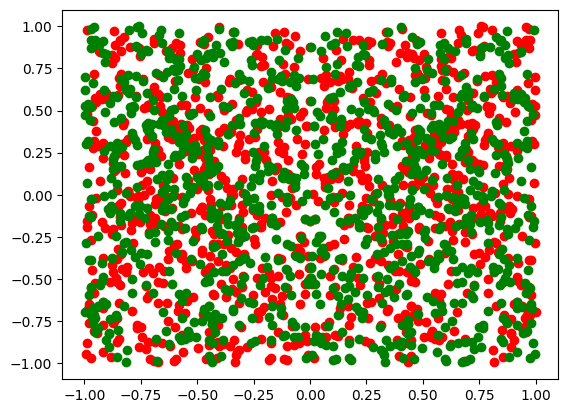

In [394]:
plt.scatter(x_input[:,0],x_input[:,1],c='RED')
plt.scatter(x_ground[:,0],x_ground[:,1],c='GREEN')
plt.show()

In [395]:
alpha = 0.1
epoch =100

a0 = np.array([0.5,0.5]).reshape(2,1) #input
y = np.array([-0.5,0.5]).reshape(2,1) #reflection

w1,b1,w2,b2 = init_params(2,10,2)

for i in range(epoch):
    cost = 0;
    for j in range(1000):
        a0 = x_input[j,:].T.reshape(2,1)
        y = x_ground[j,:].T.reshape(2,1)
        Z1,a1,Z2,a2 = forward_prop(w1,b1,w2,b2,a0)
        dw1,db1,dw2,db2 = back_prop(a2,y,Z2,a1,w2,Z1,a0)
        w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        cost = np.sum((a2-y)**2)*0.5
    print(cost) 

0.002183696454991984
0.00100571570919648
0.0004708519784586975
0.00027352238029552717
0.000172400753597645
0.00011230088067381601
7.366683696766024e-05
4.6814106971138134e-05
2.8348129112954984e-05
1.702489531801717e-05
1.015930669790499e-05
6.234765881969078e-06
3.927850184750797e-06
2.66277008777856e-06
1.812956003314738e-06
1.2345777980927712e-06
8.434568407816966e-07
5.744403947403004e-07
3.9628214503425703e-07
2.737863755357019e-07
1.8975003922855042e-07
1.3081217128717877e-07
9.016905101556693e-08
6.217882960405118e-08
4.301633572675897e-08
2.9853091628388586e-08
2.0775920642476345e-08
1.4497392299162222e-08
1.0146434939530472e-08
7.121895139337118e-09
5.012177485455967e-09
3.536039476980459e-09
2.5018897873385133e-09
1.7770836225663643e-09
1.2664093338842318e-09
9.050036442320098e-10
6.481454897468943e-10
4.6484829874640704e-10
3.335495607472368e-10
2.391794574854305e-10
1.7115886725224925e-10
1.2202719540898475e-10
8.649849641920956e-11
6.1333383973264e-11
4.452059465982978e-11

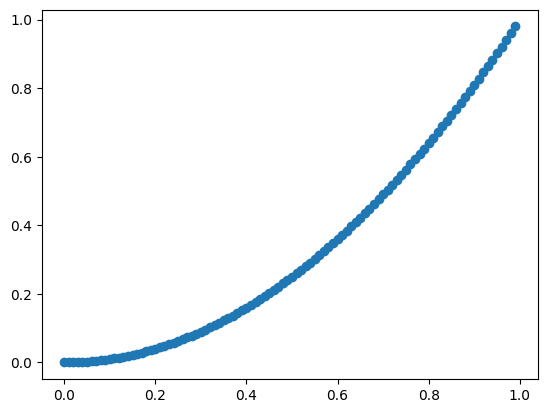

[[0.000e+00 0.000e+00]
 [1.000e-02 1.000e-04]
 [2.000e-02 4.000e-04]
 [3.000e-02 9.000e-04]
 [4.000e-02 1.600e-03]
 [5.000e-02 2.500e-03]
 [6.000e-02 3.600e-03]
 [7.000e-02 4.900e-03]
 [8.000e-02 6.400e-03]
 [9.000e-02 8.100e-03]
 [1.000e-01 1.000e-02]
 [1.100e-01 1.210e-02]
 [1.200e-01 1.440e-02]
 [1.300e-01 1.690e-02]
 [1.400e-01 1.960e-02]
 [1.500e-01 2.250e-02]
 [1.600e-01 2.560e-02]
 [1.700e-01 2.890e-02]
 [1.800e-01 3.240e-02]
 [1.900e-01 3.610e-02]
 [2.000e-01 4.000e-02]
 [2.100e-01 4.410e-02]
 [2.200e-01 4.840e-02]
 [2.300e-01 5.290e-02]
 [2.400e-01 5.760e-02]
 [2.500e-01 6.250e-02]
 [2.600e-01 6.760e-02]
 [2.700e-01 7.290e-02]
 [2.800e-01 7.840e-02]
 [2.900e-01 8.410e-02]
 [3.000e-01 9.000e-02]
 [3.100e-01 9.610e-02]
 [3.200e-01 1.024e-01]
 [3.300e-01 1.089e-01]
 [3.400e-01 1.156e-01]
 [3.500e-01 1.225e-01]
 [3.600e-01 1.296e-01]
 [3.700e-01 1.369e-01]
 [3.800e-01 1.444e-01]
 [3.900e-01 1.521e-01]
 [4.000e-01 1.600e-01]
 [4.100e-01 1.681e-01]
 [4.200e-01 1.764e-01]
 [4.300e-01

In [396]:
test_x = np.arange(0,1,0.01)
test_y = test_x**2

plt.scatter(test_x,test_y)
plt.show()

test = np.column_stack([test_x,test_y])
print(test)

In [397]:
n = test.shape[0]
print(n)

o_x= []
o_y= []
for i in range(n):
    a0 = test[i,:].T.reshape(2,1)
    Z1,a1,Z2,a2 = forward_prop(w1,b1,w2,b2,a0)
    o_x.append(a2[0,0])
    o_y.append(a2[1,0])

100


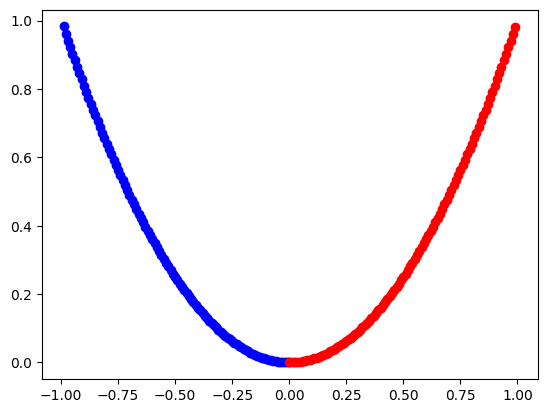

In [398]:
plt.scatter(o_x,o_y,c='BLUE')
plt.scatter(test[:,0],test[:,1],c='RED')
plt.show()

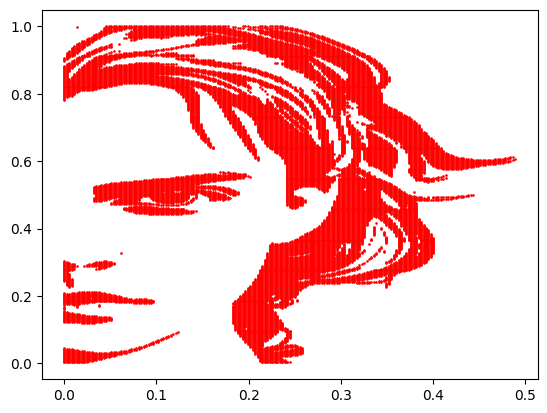

In [399]:
import pandas as pd
xtest = pd.read_csv('file.csv')
xtest = np.array(xtest)
plt.scatter(xtest[:,0],xtest[:,1],c= 'red',s=0.8)

In [400]:
n = xtest.shape[0]
o_x= []
o_y= []
for i in range(n):
    a0 = xtest[i,:].T.reshape(2,1)
    Z1,a1,Z2,a2 = forward_prop(w1,b1,w2,b2,a0)
    o_x.append(a2[0,0])
    o_y.append(a2[1,0])

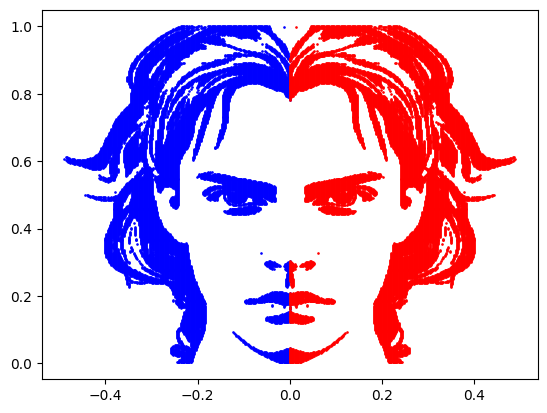

In [401]:
plt.scatter(o_x,o_y,s=.8,c='BLUE')
plt.scatter(xtest[:,0],xtest[:,1],s=.8,c='RED')
plt.show()